In [1]:
import celldancer as cd
import anndata
import pandas as pd
import numpy as np
import scipy as sp
import os

In [2]:
adata = anndata.read_h5ad('../data/A549_TGFB1.h5ad')

In [3]:
import scanpy as sc
sc.pp.neighbors(adata, n_neighbors = 20)
sc.tl.umap(adata)

In [5]:
df = cd.adata_to_df_with_embed(adata,
                               cell_type_para='time',
                               embed_para='X_umap')

100%|███████████████████████████████████████| 2000/2000 [00:51<00:00, 38.89it/s]


In [6]:
df_loss , df = cd.velocity(df)

Using /Users/cliffzhou/Documents/GitHub/scTT/example_notebooks/cellDancer_velocity_2023-07-22 17-39-40 as the output path.
Arranging genes for parallel job.
2000  genes were arranged to  250  portions.



Velocity Estimation: 100%|██████████| 250/250 [26:05<00:00,  6.56s/it]          
                                                                                

In [8]:
df

,cellIndex,gene_name,unsplice,splice,unsplice_predict,splice_predict,alpha,beta,gamma,loss,cellID,clusters,embedding1,embedding2
0,0,IFT81,0.155099,0.131481,0.120135,0.175318,0.047515,0.152911,0.188013,0.025300,Mix4a_CTCGAGGCAAGGGTCA,0d,-3.712737,-0.750966
1,1,IFT81,0.049111,0.079506,0.041708,0.087441,0.044190,0.158400,0.179095,0.025300,Mix1_CTCGTACGTTCAGCGC,0d,-0.124317,3.511954
2,2,IFT81,0.066484,0.058666,0.054977,0.078227,0.047896,0.156598,0.179831,0.025300,Mix2_TCGGGACAGAAACGCC,0d,4.117302,-0.885859
3,3,IFT81,0.032292,0.158443,0.027996,0.143943,0.034704,0.162460,0.179814,0.025300,Mix3a_ACGGCCAGTAAACGCG,0d,1.656180,4.371331
4,4,IFT81,0.042184,0.133910,0.035648,0.128551,0.037965,0.160796,0.179959,0.025300,Mix3a_GTCGTAACAATCTGCA,0d,1.049808,3.936986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6263995,3127,ACTN1,0.210640,1.670985,0.180835,1.724105,0.032617,0.295044,0.633252,0.077116,Mix4b_CGCTTCATCAGTTAGC,7d,-0.998496,0.424725
6263996,3128,ACTN1,0.153287,1.586537,0.135228,1.594073,0.034093,0.297070,0.629788,0.077116,Mix3a_CTTCTCTCAACTGCGC,7d,2.452274,3.760452
6263997,3129,ACTN1,0.136228,0.938640,0.125514,0.991922,0.046470,0.304274,0.616233,0.077116,Mix3a_TGGCTGGGTATAATGG,7d,4.269120,-3.544327
6263998,3130,ACTN1,0.138086,0.936302,0.127010,0.991616,0.046519,0.304271,0.616246,0.077116,Mix3b_GCGCAACTCACCGGGT,7d,4.469466,-2.208797


In [12]:
df.clusters.dtype

CategoricalDtype(categories=['0d', '1d', '3d', '7d', '8h'], ordered=False)

In [9]:
df = cd.compute_cell_velocity(df)

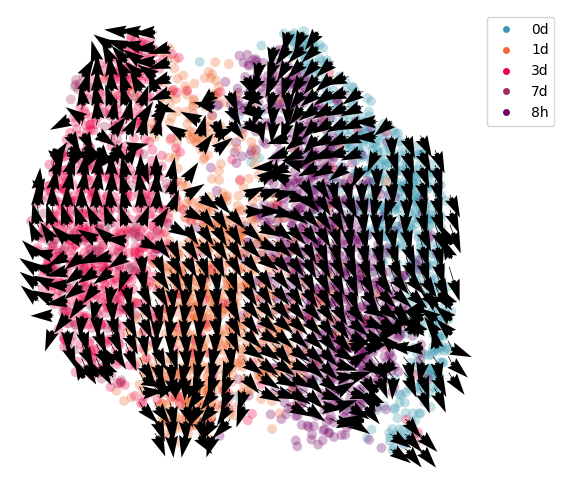

In [16]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6,6))
im = cd.cdplt.scatter_cell(ax,
                        df, 
                        colors=['0d', '1d', '3d', '7d', '8h'], 
                        alpha=0.3, 
                        s=50,
                        velocity=True,
                        legend = 'on')
ax.axis('off')
plt.show()